In [4]:
from google.cloud import bigquery
import pandas
import tensorflow as tf

client = bigquery.Client(location="US")
print("Client creating using default project: {}".format(client.project))

Client creating using default project: dogwood-actor-255317


In [5]:
query = """
SELECT 
  weight_pounds,
  is_male,
  gestation_weeks,
  mother_age,
  alcohol_use,
  CAST(mother_race AS string) AS mother_race,
  CAST(father_race AS string) AS father_race
FROM 
  `bigquery-public-data.samples.natality`
WHERE 
  gestation_weeks is not NULL AND weight_pounds is not NULL
LIMIT 
  100000
"""
query_job = client.query(
    query,
    # Location must match that of the dataset(s) referenced in the query.
    location="US",
)  # API request - starts the query

df = query_job.to_dataframe()

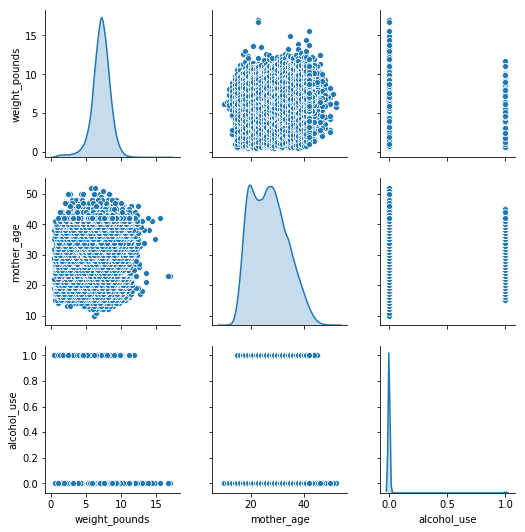

In [7]:
import seaborn as sns

df["alcohol_use"].fillna(False, inplace=True)
sns.pairplot(df[["weight_pounds", "mother_age", "alcohol_use"]], diag_kind="kde")